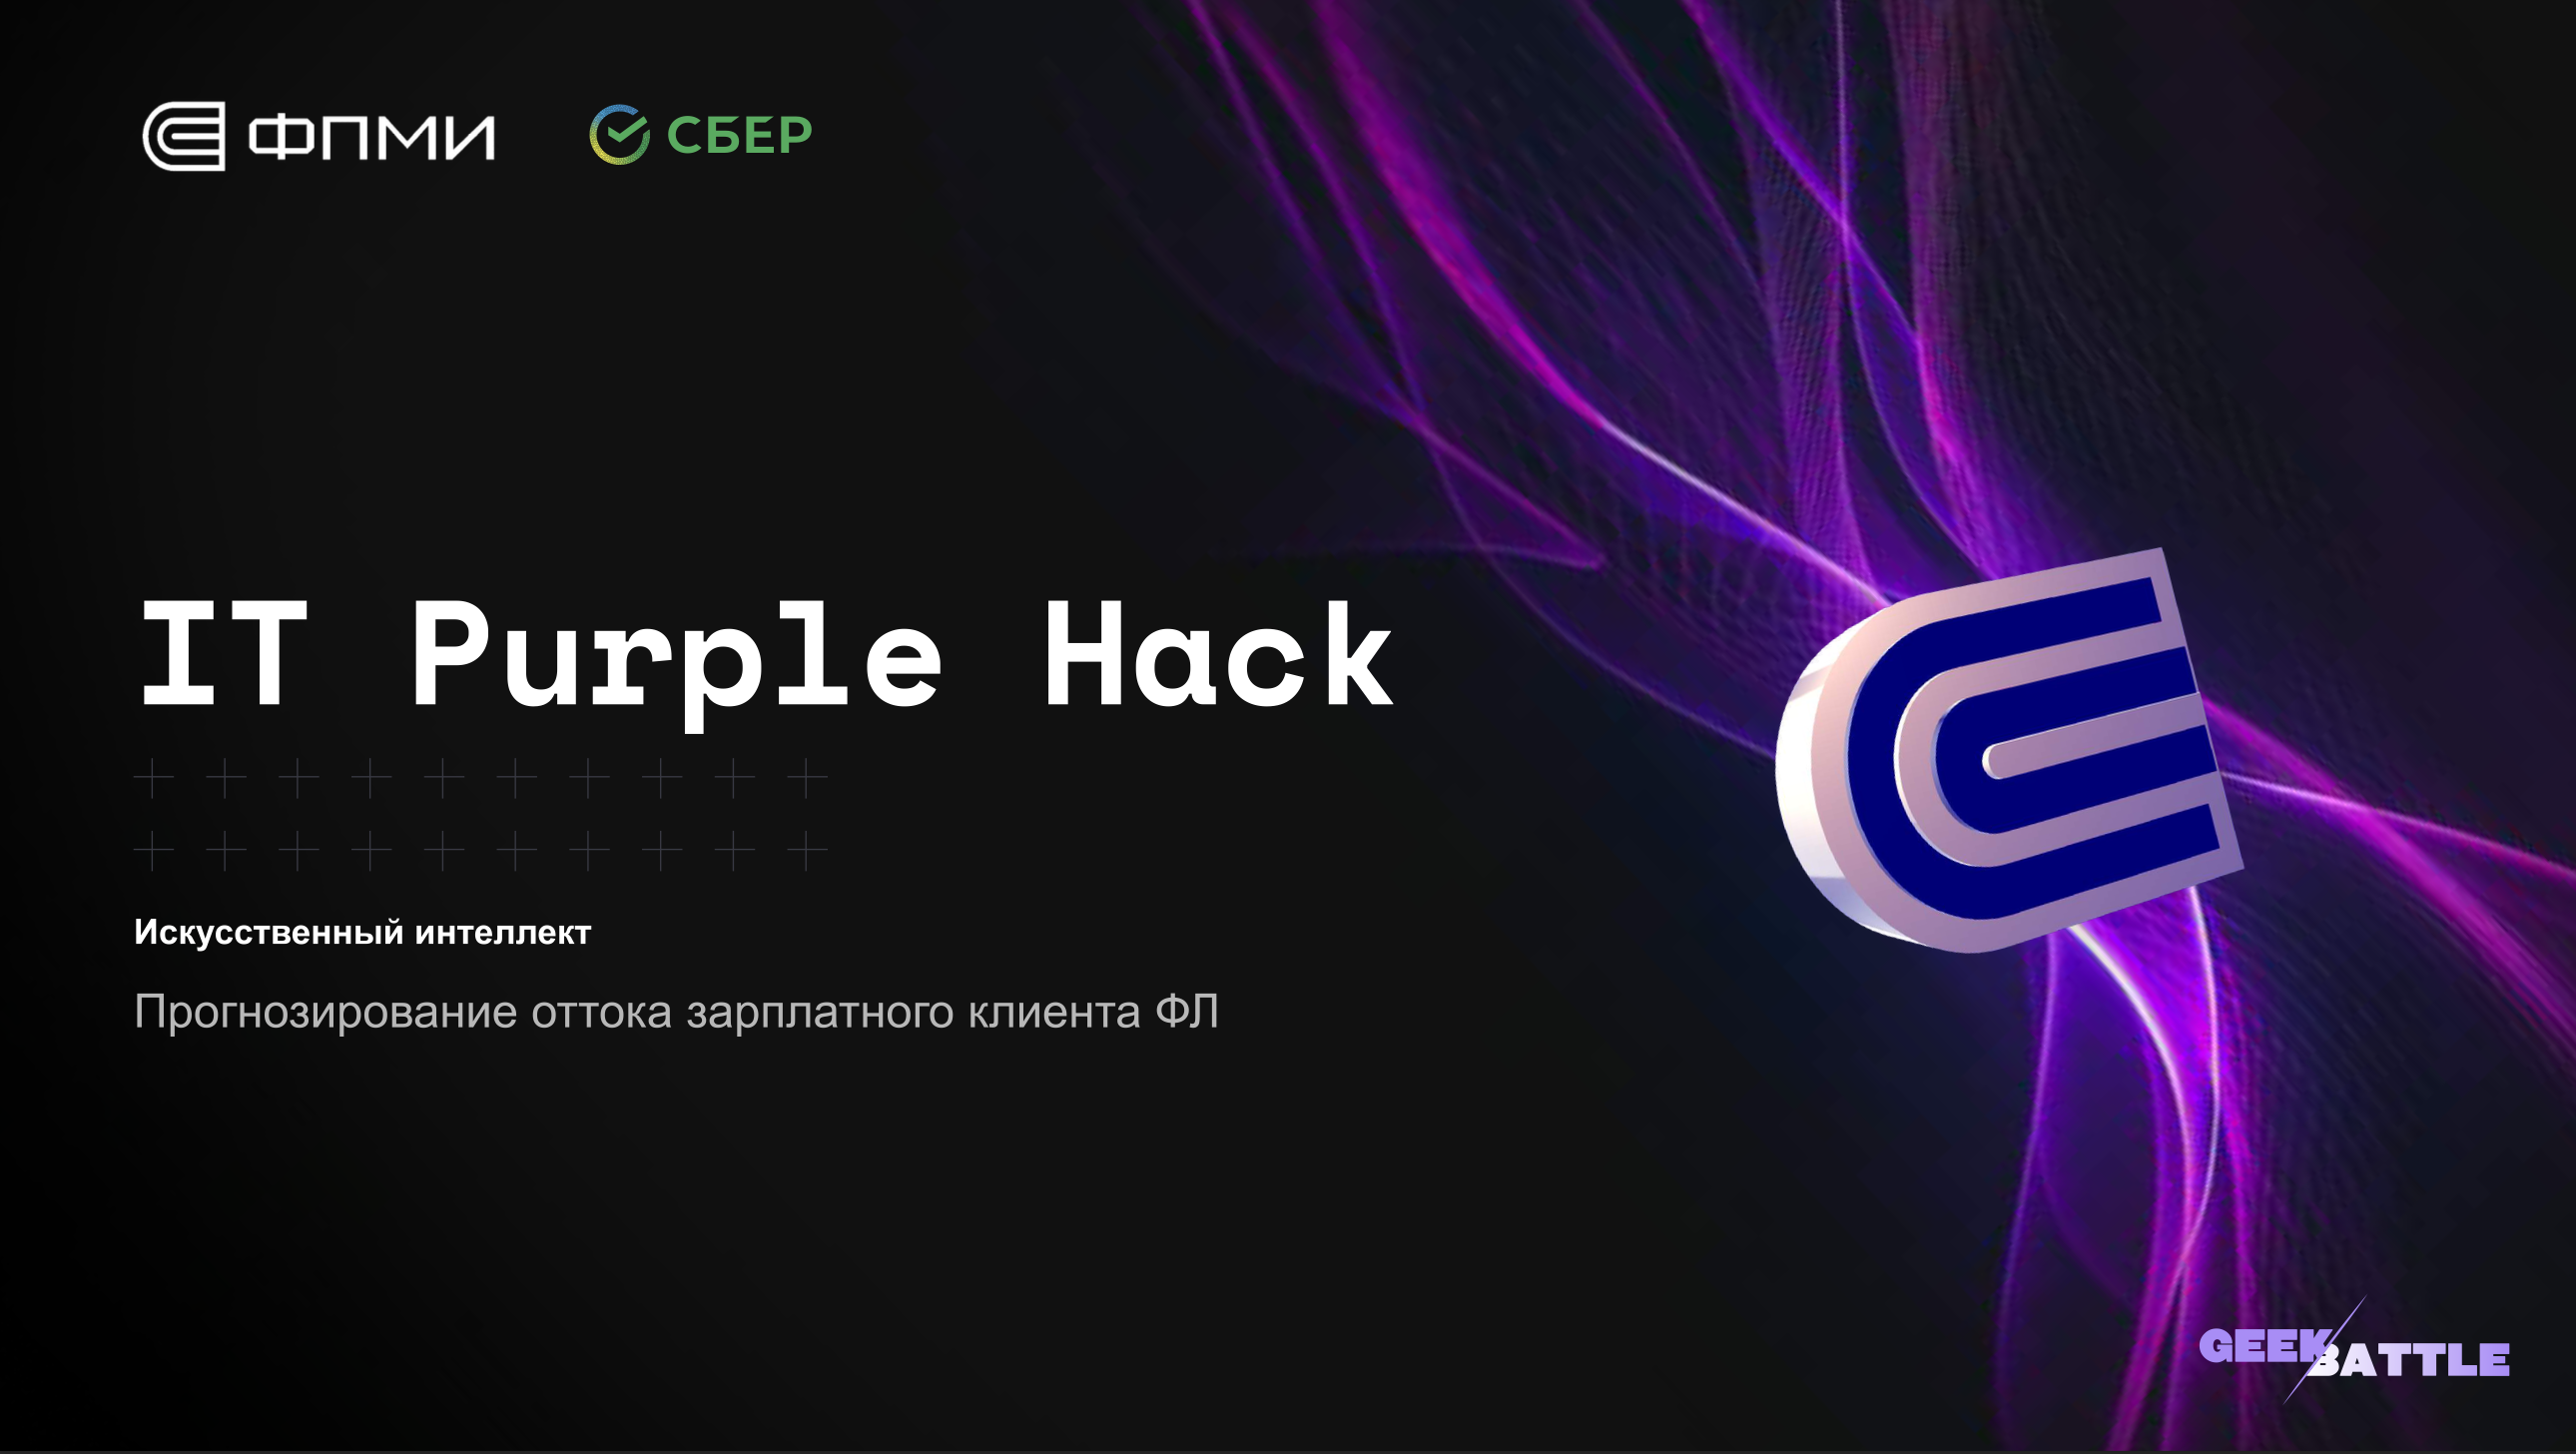

🟣 Проблематика

Банк тратит определенную сумму на привлечение зарплатного клиента (клиента, который официально получает заработную плату на карту банка.). Зарплатный клиент приносит банку больше прибыли, чем обычный клиент. Когда зарплатный клиент уводит свою зарплату из банка в другой банк, то банк теряет прибыль, такие события называются оттоком. Проблема заключается в том, что банк узнает об оттоке по факту отсутствия заработной платы

🟣 Желаемый результат

Модель машинного обучения, которая предсказывает на ежедневной основе отток зарплатных клиентов из банка до возникновения самого события оттока, используя данные поведения клиента: транзакции, продукты, мобильное приложение, терминалы, прочее

# TL;DR

Выявленные особенности данных:
- 
-
-
-

# Exploratory data analysis

Задача EDA - изучить данные, найти закономерности, характеристики и особенности, на основании которых будет спланирована дальнейшая работа по обработке данных, обучению и тюнингу предиктивной модели

In [1]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from utils import download_raw_data_from_drive_and_open_in_pandas,
#                  drop_ununique_features

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

colors = ["#A115FE", "#8F00FF", "#2c0652", "#29AB50", "#22753b", "#ECE919", "#7a781d", "#0F91D0", "#0f3f75"]
sns.set_palette(sns.color_palette(colors))

In [2]:
# для локального открытия файла с данными
file_path = "Data/train_ai_comp_final_dp.parquet"
df = pd.read_parquet(file_path, index='id')

# для скачивания и открытия сырых данных с диска
#df = download_raw_data_from_drive_and_open_in_pandas()

In [3]:
df.sample(10)

target  sample_ml_new  feature1  feature2  feature3  feature4  \
id                                                                      
187711       0              1      1761      1759        46    105555   
416516       1              1      1474       762       124    105097   
249052       0              1      1761      1759       141     10375   
225695       0              1      1626         4        37     99840   
157955       0              1      1761      1759        65     86345   
676751       0              1      1761      1759       141    102267   
8189         0              1      1641      1759        66    102414   
482941       0              1      1619      1759       134    104542   
17840        0              1      1645      1759        84     94820   
126299       0              1      1608      1608       141    105541   

        feature5  feature6  feature7  feature8  feature9  feature10  \
id                                                                    
187711        18         0         0         0        10          0   
416516       191        26         0       114       117          0   
249052       191        17       125       290       298        176   
225695        81        14         0         0         0          0   
157955       191        25       125       290       298        176   
676751       191        60       125       290       298        176   
8189          13        71         0         0        50          0   
482941       191       105         0        89       138          0   
17840          3        38         0         0         0          0   
126299       191        52         0         0        59          0   

        feature11  feature12  feature13  feature14  feature15  feature16  \
id                                                                         
187711          0         40         18          1          0          1   
416516          0         67        191         28        114         15   
249052        121        187        191        227        282        243   
225695          0        187         81          1          0          0   
157955        121        187        191        227        282        243   
676751        121        187        191        227        282        243   
8189            0         40         13          1          0         41   
482941          0          2        191         39         89          0   
17840           0          5          3          1          0          0   
126299          0        125        191          1          0         19   

        feature17  feature18  feature19  feature20  feature21  feature22  \
id                                                                         
187711          1          1          7          7         13      23429   
416516         23          9        248        248        347     140184   
249052        275         28        248        248        347     140184   
225695          0         28        206        206        303     126735   
157955        275         28        248        248        347     140184   
676751        275         28        248        248        347     140184   
8189           32          4        217        217        314          0   
482941          0         11        248        248        347     140184   
17840           0         28        198        198        287     131647   
126299         19          4        248        248        347     140184   

        feature23  feature24  feature25  feature26  feature27  feature28  \
id                                                                         
187711          9        248        938          5          8          9   
416516          9        248       1722          5          8          9   
249052          9        248       1722          5          8          9   
225695          9        248       1722          5          8          9

🟣 

При первом взгляде на данные можно заметить часто повторяющиеся специфические значения (1761, 125, 290, 298, 176, ...) в одних колонках у разных пользователей. Это, вероятно, кодировки категориальных характеристик клиентов

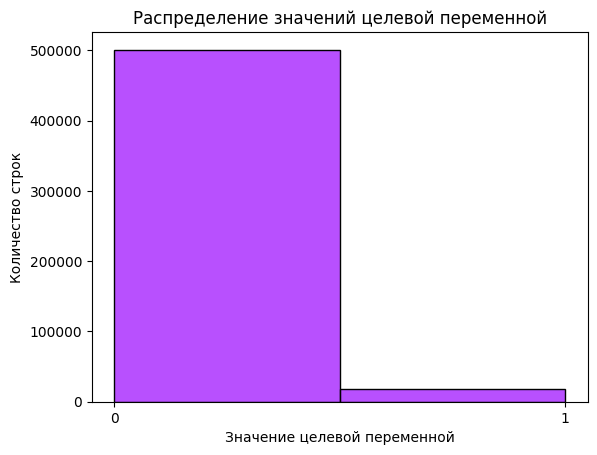

In [4]:
target = df['target']

ax = sns.histplot(target, 
                  bins=2)
ax.xaxis.set_ticks([0, 1])
ax.set_xticklabels([0, 1])
ax.set_title('Распределение значений целевой переменной')
plt.xlabel('Значение целевой переменной')
plt.ylabel('Количество строк')
plt.show()

🟣 

Мы решаем задачу прогнозирования оттока зарплатного клиента. Факт оттока отмечен значением 0 в целевой переменной, классы соотносятся крайне непропорционально, что потребудет дополнительной обработки до (over-sampling/under-sampling) или во время обучения (алгоритмы на деревьях/работа с loss-функцией)

In [5]:
df.sample_ml_new.unique() # у нас только данные для обучения

array([1])

In [6]:
# проверим типы данных

pd.DataFrame(df.dtypes, columns=['type']).groupby('type').value_counts()

type
int64      1077
float64       2
Name: count, dtype: int64

In [7]:
# проверим колонки с float64

df.columns[df.dtypes != np.int64].to_list()

['feature642', 'feature756']

In [8]:
# проверим признаки на наличие пустых значений

df.columns[df.isna().any()].tolist()

['feature642', 'feature756']

При вероятном наличии категориальных признаков, только два столбца имеют отличающийся от числового тип данных (из-за имеющихся NaN)

In [9]:
df.feature756.unique()

array([nan])

In [10]:
df.feature642.unique()

array([ 0., nan,  1.])

In [11]:
df.feature642.value_counts(dropna=False) / df.shape[0] * 100

feature642
NaN    60.684160
0.0    38.552197
1.0     0.763642
Name: count, dtype: float64

🟣 

В признаке feature756 имеем только пустые значения

В признаке feature642 имеем около 61% пустых значений, 38% нулей и меньше 1% единиц. Для принятия решения по этой колонке проверим корреляцию с целевой переменной

In [12]:
df[['target', 'feature642']].astype('str').fillna('999').corr()

,target,feature642
target,1.000000,-0.007747
feature642,-0.007747,1.000000


In [13]:
df[['target', 'feature988']].corr()

,target,feature988
target,1.000000,-0.048093
feature988,-0.048093,1.000000


In [14]:
df[['target', 'feature8']].corr()

,target,feature8
target,1.000000,0.029312
feature8,0.029312,1.000000


Корреляция с целевой переменной находится на незначительном уровне по сравнению с другими случайными призанаками, что, скорее всего, означает, что мы не сможем качественно использовать оба признака с NaN при обучении

In [15]:
df.drop(['target', 'sample_ml_new'], axis=1, inplace=True) # TODO вынести в препроцессинг

In [16]:
df.drop(['feature756', 'feature642'], axis=1, inplace=True) # TODO вынести в препроцессинг

🟣 

Из-за отсутствия описания признаков для нас неочевидно, какие из них являются категориальными, какие - датами или временными отсечками, а какие - числовыми/количественными. При этом нам важно попробовать выделить категориальные для применения более подходящей обработки перед обучением в целях повышения точности модели

Для начала посмотрим на кол-во уникальных значений в каждом признаке

In [17]:
df.nunique()

feature1               1728
feature2               1728
feature3                141
feature4              80146
feature5                189
feature6                281
feature7                120
feature8                287
feature9                297
feature10               168
feature11               117
feature12               184
feature13               189
feature14               225
feature15               279
feature16               243
feature17               273
feature18                29
feature19               219
feature20               219
feature21               291
feature22            108457
feature23                 8
feature24               239
feature25              1649
feature26                 4
feature27                 7
feature28                 8
feature29               241
feature30              1666
feature31               489
feature32              1358
feature33             39329
feature34             41131
feature35             52160
feature36           

🟣 

Можем заметить следующие особенности: 
- признаки с одним уникальным значением
- общее низкое количество уникальных значений в колонках относительно размера датасета
- признаки с повторяющимся количеством уникальных значений последовательно и часто попарно

Разберем каждый пункт детальнее

🟣 

Найдем и дропнем все признаки с только одним уникальным значением, они не дадут модели дополнительной информации о закономерностях в данных

In [18]:
print(len(df.columns[df.nunique() == 1].to_list()))

df.drop(df.columns[df.nunique() == 1].to_list(), axis=1, inplace=True)

88


🟣 

Рассмотрим распределение количества уникальных значений в фичах (без бинарных вида 0,1)

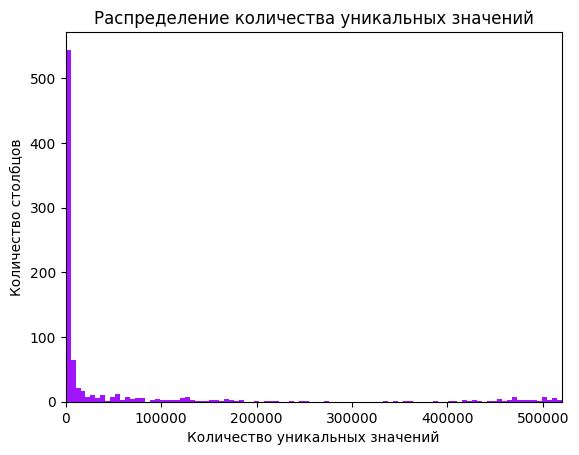

In [19]:
plt.hist(df[df.columns[~(df.nunique() == 2)]].nunique(), 
         bins = 100)
plt.title('Распределение количества уникальных значений')
plt.xlabel('Количество уникальных значений')
plt.ylabel('Количество столбцов')
plt.xlim(0, df.shape[0])
plt.show()

🟣 

По графику видно следующее:
- подавляющая часть признаков имеет минимальное количество уникальных значений
- небольшая группа признаков имеет практически полностью уникальные значения (правый край графика)
- еще одна небольшая группа имеет промежуточные количественные показатели уникальности значений ближе к 100000

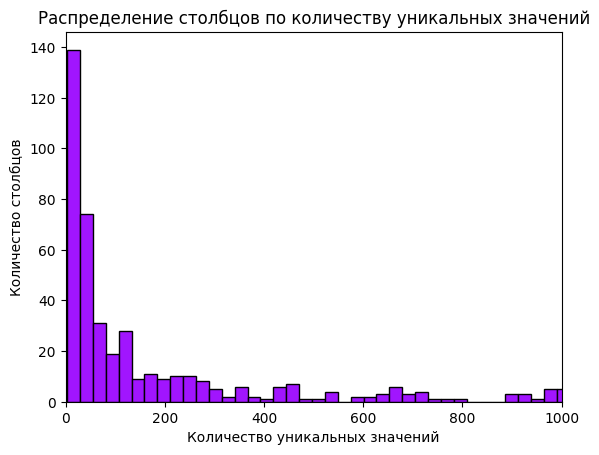

In [20]:
# тот же график с приближением на начало осей

plt.hist(df[df.columns[~(df.nunique() == 2)]].nunique(), 
         bins = 20000,
         edgecolor='black')
plt.title('Распределение столбцов по количеству уникальных значений')
plt.xlabel('Количество уникальных значений')
plt.ylabel('Количество столбцов')
plt.xlim(0, 1000)
plt.show()

🟣 

По более детальному графику видно, что около 350 признаков (без учета бинарных вида 0,1) имеют вариативность до 200 уникальных значений на признак, еще около 100 - до 1000, что потенциально может говорить об их категориальной природе

!!!!!!!!!!! TODO добавить супер-приближение на начало

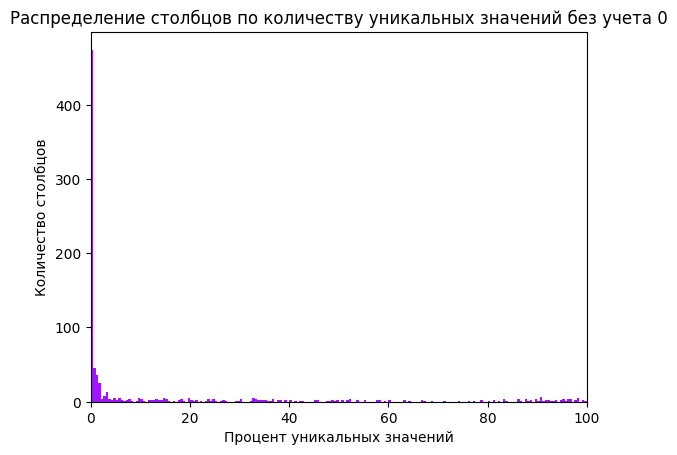

In [21]:
plt.hist(df[df.columns[~(df.nunique() == 2)]].nunique() / (df != 0).sum() * 100, 
         bins = 200)
plt.title('Распределение столбцов по количеству уникальных значений без учета 0')
plt.xlabel('Процент уникальных значений')
plt.ylabel('Количество столбцов')
plt.xlim(0, 100)
plt.show()

🟣 

По графику видно, что подавляющее число столбцов (~700) имеет низкий % уникальных значений относительно размера колонки даже без учета строк, равных 0 (предположительная замена пропуску)

Это могут быть как количественные признаки по типу агрегированных логов работы с продуктами банка, так и категориальные

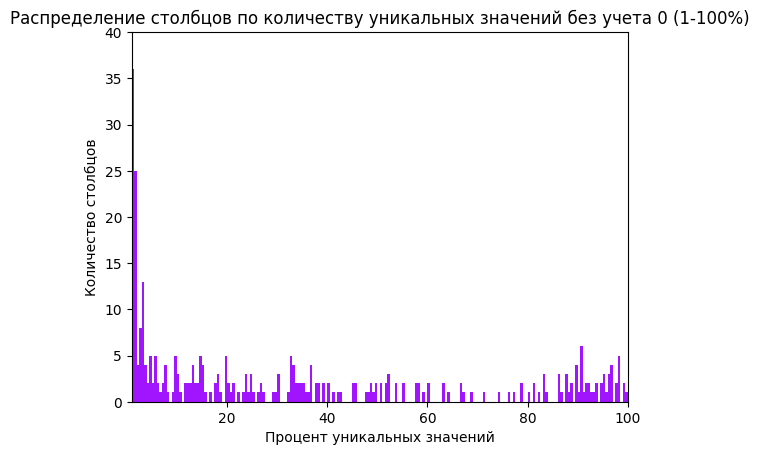

In [22]:
plt.hist(df[df.columns[~(df.nunique() == 2)]].nunique() / (df != 0).sum() * 100, 
         bins = 200)
plt.title('Распределение столбцов по количеству уникальных значений без учета 0 (1-100%)')
plt.xlabel('Процент уникальных значений')
plt.ylabel('Количество столбцов')
plt.xlim(1, 100)
plt.ylim(0, 40)
plt.show()

# TODO добавить подходящие тики по OX

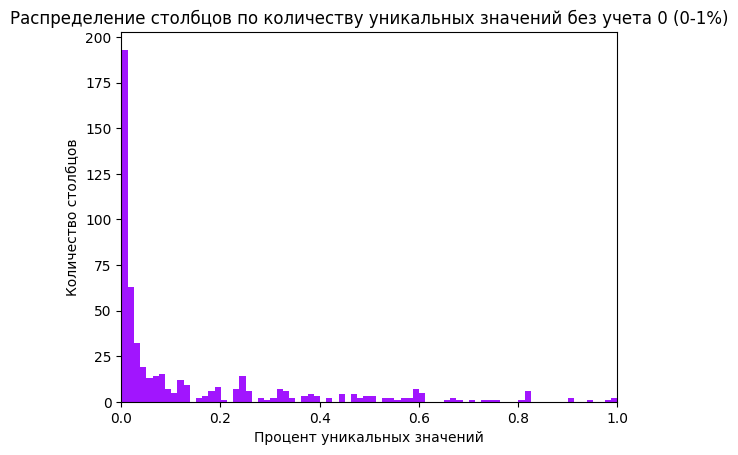

In [23]:
plt.hist(df[df.columns[~(df.nunique() == 2)]].nunique() / (df != 0).sum() * 100, 
         bins = 8000)
plt.title('Распределение столбцов по количеству уникальных значений без учета 0 (0-1%)')
plt.xlabel('Процент уникальных значений')
plt.ylabel('Количество столбцов')
plt.xlim(0, 1)
plt.show()

# TODO добавить подходящие тики по OX

🟣 

После приближения графиков видно, что значительное количество колонок имеет всего ~0.6% уникальных значений относительно размера столбца без учета строк, равных 0 (а пик и резкий спад находятся диапазоне от 0% до 0.15%)

In [24]:
# максимальное количество уникальных значений в выбранных нами признаках

df.shape[0] * 0.15 / 100

779.4225

In [25]:
(df[df.columns[~(df.nunique() == 2)]].nunique() / (df != 0).sum() * 100 <= 0.15).sum()

382

🟣 

Можем предположить, что ~382 небинарные колонки могут являться категориальными. Но в то же время, они могут быть и численными, например, количество некоторых действий за период. Попробуем разделить эти признаки. У численных, если их не отскалировали, должен быть перекос в сторону нуля

In [30]:
# объединим найденные ранее колонки с бинарными колонками

binar = set(df.columns[df.nunique() == 2])
cat_indexes = df[df.columns[~(df.nunique() == 2)]].nunique().div((df[df.columns[~(df.nunique() == 2)]] != 0).sum().values, axis=0) * 100 <= 0.15

potentially_categorical = binar.union(set(cat_indexes[cat_indexes == True].index))

# из потенциально категориальных попробуем вычесть колонки, которые могут быть численными


# TO DO поменять на признаки с равномерным ра
potentially_continuous = set(df.columns[(df.min(axis=0) == 0) & \
                            (df.max(axis=0) != 1) & \
                             df.isin([1]).any() & \
                             df.isin([2]).any() & \
                             df.isin([3]).any() & \
                             df.isin([4]).any() & \
                             df.isin([5]).any() & \
                            (df.nunique() <= 500)])

cat_cols = list(potentially_categorical - potentially_continuous)

In [31]:
len(potentially_categorical)

528

In [32]:
len(cat_cols)

233

In [33]:
df[cat_cols].sample(10)

,feature794,feature622,feature741,feature401,feature588,feature787,feature312,feature478,feature554,feature774,feature643,feature599,feature680,feature494,feature720,feature627,feature464,feature795,feature797,feature647,feature785,feature788,feature581,feature477,feature786,feature391,feature636,feature796,feature28,feature587,feature240,feature563,feature92,feature386,feature617,feature693,feature236,feature708,feature23,feature712,feature70,feature639,feature668,feature660,feature726,feature732,feature570,feature553,feature561,feature758,feature703,feature738,feature474,feature646,feature800,feature239,feature791,feature799,feature565,feature671,feature597,feature670,feature705,feature672,feature691,feature29,feature679,feature575,feature735,feature659,feature435,feature60,feature628,feature567,feature393,feature798,feature408,feature400,feature445,feature717,feature650,feature694,feature583,feature443,feature634,feature434,feature685,feature586,feature389,feature719,feature11,feature273,feature700,feature392,feature405,feature723,feature667,feature388,feature692,feature506,feature640,feature560,feature545,feature619,feature658,feature66,feature469,feature585,feature402,feature559,feature793,feature675,feature242,feature466,feature884,feature707,feature904,feature1037,feature706,feature649,feature509,feature688,feature394,feature789,feature245,feature237,feature618,feature566,feature645,feature85,feature664,feature564,feature232,feature404,feature654,feature568,feature754,feature293,feature757,feature624,feature463,feature689,feature775,feature146,feature711,feature61,feature626,feature704,feature31,feature475,feature682,feature698,feature569,feature673,feature578,feature396,feature24,feature302,feature637,feature465,feature790,feature748,feature537,feature715,feature714,feature662,feature621,feature702,feature676,feature755,feature321,feature630,feature655,feature713,feature709,feature701,feature285,feature699,feature26,feature1058,feature387,feature753,feature616,feature889,feature385,feature10,feature488,feature584,feature476,feature695,feature631,feature792,feature298,feature652,feature241,feature235,feature62,feature579,feature697,feature633,feature444,feature289,feature27,feature536,feature471,feature744,feature325,feature523,feature684,feature562,feature301,feature7,feature665,feature326,feature384,feature571,feature644,feature718,feature1044,feature398,feature903,feature437,feature910,feature431,feature318,feature544,feature886,feature580,feature687,feature574,feature582,feature281,feature729
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
604387,1,0,0,0,0,0,657,1,19,2,0,0,0,87,0,0,0,1,0,0,1,0,6,1,1,0,0,1,9,0,15,3,618,0,0,0,4,0,9,1,247,0,0,0,0,0,0,15,1,1,0,0,18,0,3,16,1,1,2,0,0,0,0,0,1,250,0,0,0,0,1,63,0,0,0,0,13,0,0,4,1,0,2,0,0,1,0,11,1,0,0,38,0,0,0,0,0,1,1,62,0,83,0,0,0,45,18,15,0,83,0,1,0,1,224,0,1270,0,0,1,585,1,2,1,0,2,0,0,1,756,1,4,4,3,0,0,1,123,0,0,0,1,4,852,0,833,0,0,633,11,0,0,0,0,0,0,248,36,0,0,1,6,0,0,1,0,0,0,1,1,9,0,0,1,0,0,32,0,5,0,1,0,0,10,0,0,87,8,1,0,0,0,823,0,11,3,736,6,0,0,0,409,8,0,2,1,10,612,0,1,11,0,1,1222,0,0,1,4,0,0,4,0,9,1,26,0,5,6,0,0,2,8,0
198710,1,0,0,0,0,0,657,1,18,2,0,0,1,153,0,0,0,1,0,0,1,0,0,1,1,0,0,1,9,0,0,3,618,0,0,1,0,0,9,1,247,0,1,0,0,0,0,15,1,1,1,0,14,0,1,0,1,0,2,0,1,0,0,0,1,173,0,0,0,0,1,63,0,0,0,0,13,0,1,4,1,0,0,1,0,0,0,0,1,0,0,38,0,0,0,0,0,1,1,120,0,157,1,0,0,45,14,0,0,157,0,1,0,1,224,0,1270,0,0,1,585,1,2,1,0,0,0,0,1,756,1,4,0,3,1,0,1,123,0,0,0,1,4,852,0,833,0,0,633,10,0,1,0,0,0,1,172,36,0,0,1,6,0,0,1,0,0,0,1,1,9,0,1,1,0,0,32,0,5,0,1,0,0,10,0,0,153,0,0,1,0,0,823,0,0,0,736,0,0,0,1,409,8,0,2,1,10,612,0,1,11,0,1,1222,0,0,1,4,0,0,4,0,9,1,37,0,5,0,1,0,0,8,0
430927,1,0,0,0,0,0,657,1,12,2,0,0,0,47,0,0,0,1,0,1,1,0,0,1,1,1,0,1,9,0,0,3,618,0,0,1,0,0,9,1,247,0,1,0,0,0,0,10,1,1,0,0,16,1,3,0,1,0,2,0,1,0,0,

🟣 

При мануальном просмотре можно заметить несколько колонок, все-таки похожих на непрерывные / количественные признаки: 
- feature488
- feature506
- feature475
- feature474
- feature559
- feature560
- feature553

Рассмотрим их поближе

In [ ]:
# max >= 5*квантиль_75%

In [46]:
df.feature553.max() / df.feature553.quantile(q=0.75)

28.166666666666668

In [56]:
((df.max() / df.quantile(q=0.75) < np.inf) & (df.max() / df.quantile(q=0.75) > 5)).sum()

100

In [36]:
df.feature488.describe()

count    519615.000000
mean         83.618423
std          66.830063
min           0.000000
25%          41.000000
50%          72.000000
75%         110.000000
max         702.000000
Name: feature488, dtype: float64

In [35]:
df.describe(include='all')

feature1       feature2       feature3       feature4  \
count  519615.000000  519615.000000  519615.000000  519615.000000   
mean     1578.921015    1308.410059      76.305130   94386.514377   
std       315.711163     660.446967      44.797241   22230.941664   
min         0.000000       0.000000       0.000000       0.000000   
25%      1600.000000     769.000000      37.000000   97557.000000   
50%      1668.000000    1759.000000      76.000000  102538.000000   
75%      1761.000000    1759.000000     117.000000  104624.000000   
max      1761.000000    1759.000000     141.000000  106448.000000   

            feature5       feature6       feature7       feature8  \
count  519615.000000  519615.000000  519615.000000  519615.000000   
mean      139.003685      41.424410      35.771227      94.050995   
std        74.734122      40.463193      56.144121     127.158066   
min         0.000000       0.000000       0.000000       0.000000   
25%        63.000000      12.000000       0.000000       0.000000   
50%       191.000000      31.000000       0.000000       0.000000   
75%       191.000000      63.000000     125.000000     290.000000   
max       191.000000     284.000000     125.000000     290.000000   

            feature9      feature10      feature11      feature12  \
count  519615.000000  519615.000000  519615.000000  519615.000000   
mean      128.132198      50.524941      34.616953     118.291031   
std       119.933782      79.073395      54.347273      74.379883   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.000000       0.000000       0.000000      46.000000   
50%        95.000000       0.000000       0.000000     187.000000   
75%       298.000000     176.000000     121.000000     187.000000   
max       298.000000     176.000000     121.000000     187.000000   

           feature13      feature14      feature15      feature16  \
count  519615.000000  519615.000000  519615.000000  519615.000000   
mean      139.003685      68.484441      90.192433      83.639375   
std        74.734122     100.573920     123.750381     104.047542   
min         0.000000       0.000000       0.000000       0.000000   
25%        63.000000       1.000000       0.000000       0.000000   
50%       191.000000       1.000000       0.000000      20.000000   
75%       191.000000     227.000000     282.000000     243.000000   
max       191.000000     227.000000     282.000000     243.000000   

           feature17      feature18      feature19      feature20  \
count  519615.000000  519615.000000  519615.000000  519615.000000   
mean       97.720279      15.909920     206.532127     206.545823   
std       116.998952      11.127697      75.265778      75.248052   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       5.000000     197.000000     197.000000   
50%        27.000000      13.000000     248.000000     248.000000   
75%       275.000000      28.000000     248.000000     248.000000   
max       275.000000      28.000000     248.000000     248.000000   

           feature21      feature22      feature23      feature24  \
count  519615.000000  519615.000000  519615.000000  519615.000000   
mean      292.067833  102614.761406       8.999925     236.897284   
std       101.946755   55807.968223       0.021446      34.019064   
min         0.000000       0.000000       0.000000       0.000000   
25%       283.000000   59003.500000       9.000000     248.000000   
50%       347.000000  140184.000000       9.000000     248.000000   
75%       347.000000  140184.000000       9.000000     248.000000   
max       347.000000  140184.000000       9.000000     248.000000   

           feature25      feature26      feature27      feature28  \
count  519615.000000  519615.000000  519615.000000  519615.000000   
mean     1452.476484       4.999983       7.999942       8.999925   
std       497.221173       0.007471       0.017438       0.021446   
min 

In [ ]:
df.feature488.hist(bins=300)

In [ ]:
df.feature506.hist(bins=300)

In [ ]:
df.feature475.hist(bins=300)

In [ ]:
df.feature474.hist(bins=300)

In [ ]:
df.feature559.hist(bins=300)

In [ ]:
df.feature560.hist(bins=300)

In [ ]:
df.feature553.hist(bins=300)

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [ ]:
# Artem cat features 
cat_features_tmp = list(set(cat_cols) - set(['feature488', 'feature506', 'feature475', 'feature474', 'feature559', 'feature560', 'feature553']))
cat_features = [feature for feature in cat_features_tmp if feature in df.columns]

# convert cats to string
for col in cat_features:
    df[col] = df[col].astype(str)


X = df
y = target
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = CatBoostClassifier(iterations=500, learning_rate=0.01, depth=8, loss_function='Logloss', cat_features=cat_features)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

y_train_pred = model.predict_proba(X_train)[:, 1]
y_val_pred = model.predict_proba(X_val)[:, 1]

predictions = np.where(y_val_pred > 0.05, 1, 0)

roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_val, y_val_pred)
print(f"roc-auc train {roc_auc_train}")
print(f"roc-auc test {roc_auc_test}")
print(classification_report(y_val, predictions))

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

In [ ]:
# Artem cat features 
cat_features_tmp = list(set(cat_cols) - set(['feature488', 'feature506', 'feature475', 'feature474', 'feature559', 'feature560', 'feature553']))
cat_features = [feature for feature in cat_features_tmp if feature in df.columns]

# convert cats to string
for col in cat_features:
    df[col] = df[col].astype(str)


X = df
y = target
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=8, loss_function='Logloss', cat_features=cat_features)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)


# metrics
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {classification_report(y_test, y_pred)}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba.ravel()[1::2])

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')


# sorted feature importance
feature_weights = {feature: weight for feature, weight in zip(X.columns, model.feature_importances_)}
dict(sorted(feature_weights.items(), key=lambda item: item[1], reverse=True))

🟣 

До этого мы не исследовали колонки их двух значений, одно из которых равно 0. С наибольшей вероятностью они могут быть отнесены к категориальным бинарным признакам

In [ ]:
# посчитаем количество таких предположительно категориальных признаков

len(df.columns[df.nunique() == 2])

Посмотрим распределние столбцов по % значений, равных 0

In [ ]:
plt.hist((df.shape[0] - df[df != 0].count()) / df.shape[0] * 100, bins = 40, )
plt.title('Распределение столбцов по % значений, равных нулю')
plt.xlabel('% зачений, равных 0')
plt.ylabel('Количество столбцов')
plt.xlim(0, 100)
plt.show()

Из графика видно, что у ~600 столбцов доля "ненулевых "значений находится в интервале от 0 до 10%

In [ ]:
# посмотрим пересечение множества с низкой вариативностью и низкой долей нулей и найдем количество
low_unique_values_count_zeros = \
    set(df.columns[(df.shape[0] - df[df != 0].count()) / df.shape[0] <= 0.1].to_list()) & \
    set((df.nunique()[(df.nunique() <= 500)]).index.to_list())

len(low_unique_values_count_zeros)

В результате анализа признаков по количеству уникальных значений и количества нулей, 148 столбцов из обработанного датасета могут быть категориальными, а значит требовать иной обработки. Также было замечено, что примерно половина датасета имеет низкую вариативность (500), примерно половина датасета имеет маленькую долю количество нулей (10%), пересечение таких множеств равно 236. Явно разделить данные на категориальные и непрерывные не получается, исключая уникальность 2 у значений и наличие нулей. 

Рассмотрим хитмап корреляции признаков между собой

In [ ]:
corr = df.sample(100000).iloc[:, :].corr()
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr, cmap='Purples')

In [ ]:
# 368 - 620 коррелирует с 40 - 270

corr = df.sample(100000).iloc[:, 43:620].corr()
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr, cmap='Purples')

Видно, что в данных имеются отдельные признаки и группы признаков с высокой взаимной корелляцией, обработаем их перед обучением модели

ПРЕДЛАГАЮ СДЕЛАТЬ ХИТМАП БЕЗ КОЛОНОК, ГДЕ ОДИНАКОВЫЕ ЗНАЧЕНИЯ, БЕЗ ПЕРВЫХ ТРЕХ, ПОТОМ УЖЕ РАССМАТРИВАТЬ ПОХОЖИЕ КОЛОНКИ

Проверим построчные дубли по всем фичам

In [ ]:
df.loc[:, 'feature1':'feature1076'].duplicated().sum()

Найдем и рассмотрим некоторые группы последовательных признаков с одинаковым количеством уникальных значений

In [ ]:
# группы с одинаковым количествомвом значений

l00 = ['feature1', 'feature2']     # одинаковое количество, но разное распределение
l01 = ['feature19', 'feature20']
l02 = ['feature210', 'feature211']
l03 = ['feature212', 'feature213']
l04 = ['feature220', 'feature221']
l05 = ['feature222', 'feature223']
l06 = ['feature227', 'feature228']
l07 = ['feature322', 'feature323']
l08 = ['feature589', 'feature590']
l09 = ['feature603', 'feature604']
l10 = ['feature611', 'feature612']
l11 = ['feature721', 'feature722']
l12 = ['feature746', 'feature747']
l13 = ['feature890', 'feature891'] # близко, но неидентично по распределению
l14 = ['feature916', 'feature917'] # близко, но неидентично по распределению
l15 = ['feature918', 'feature919'] # одинаковое количество, но разное распределение
l16 = ['feature1038', 'feature1039', 'feature1040', 'feature1041']
l17 = ['feature1045', 'feature1046', 'feature1047', 'feature1048']
l18 = ['feature1059', 'feature1060', 'feature1061', 'feature1062']

In [ ]:
df[l07].hist()

In [ ]:
df[l07].corr()

In [ ]:
df[l09].hist()

In [ ]:
df[l09].corr()

Оставим по одному "идентичному" (равное кол-во уникальных значений + максимальная корреляция). На данный момент мы не можем извлечь смысл из этих признаков и считаем их частичное удаление лучшим вариантом

In [ ]:
stop

In [ ]:
#df = remove_highly_correlated_features(df)

repeatable_columns = []

repeatable_columns.append(l01[1:])
repeatable_columns.append(l02[1:])
repeatable_columns.append(l03[1:])
repeatable_columns.append(l04[1:])
repeatable_columns.append(l05[1:])
repeatable_columns.append(l06[1:])
repeatable_columns.append(l07[1:])
repeatable_columns.append(l11[1:])
repeatable_columns.append(l12[1:])
repeatable_columns.append(l13[1:])

for i in repeatable_columns:
    for j in i:
        df.drop(j, axis=1, inplace=True)

In [ ]:
df.shape

Мы отказались от 100 признаков

Посмотрим на распределение рандомных признаков

In [ ]:
sns.violinplot(df[['feature46', 'feature149', 'feature55', 'feature94', 'feature107', 'feature126', 'feature178', 'feature185', 'feature198', 'feature211', 'feature347']])

У разных на первый взгляд непрерывных признаков разные распределения, перед PCA поработаем с дисперсиями

ДОБАВИТЬ РАСПРЕДЕЛНИЕ ДИСПЕРСИЙ ИЛИ СТАНДАРТОКТЛ

!!!! Общий вывод по всему EDA